# How many coin flips does high confidence need?

- toc: false 
- badges: true
- categories: [math]
- image: images/coin.png
- comments: true

In [1]:
#collapse-hide
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

# Set seaborn aesthetic parameters to defaults
seaborn.set()
seaborn.set_style('whitegrid')
seaborn.set_palette("dark")

import math
import numpy as np
from scipy.special import comb

np.random.seed(42)

You walked into a casino, there is a game of tossing coins. You don't know whether the coin is biased or fair. But, you have the opportunity to observe the game and keep the stats. How many tosses would you observe to measure the probability of the coin?

Though it is not possible to exactly determine the underlying probability distribution of the coin, we can measure in high confidence, if we observe enough tosses.

The probability distribution of a coin toss is known as Bernoulli distribution parameterized with p, the probability of heads. There is no way we can directly measure this. Instead, we count the heads, $k$, and divide it into total number of tosses, $n$. How do we know that this is a good way of measuring p? Well, the probability distribution of number of heads is Binomial distribution, parameterized with p and n. And the expectation of Bernoulli distribution is $np$. Therefore, if we count heads and divide it by total number of tosses, we have an estimate of $p$.

$$ 
\text{Binomial Distribution } \\
$$
$$ 
P_{p,n}(k: \text{#heads}) =  \binom{N}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

$$
\mathbb{E}[\#heads]= \sum\limits_{i=1}^n  \mathbb{E}[\mathbb{1}[coin_i]] = 
\sum\limits_{i=1}^n  p = np  \tag*{(Linearity of Expectation) }
$$

$$
\mathbb{1}[coin_i] = 1   \hspace{35pt}\text{if ith coin comes heads}\\
0 \hspace{48pt} \text{otherwise} \\
$$

Let's simulate this for 100 tosses. First, let's randomly pick $p$ and see what our estimation ends up.

In [2]:
n = 100
p = np.random.rand(1)[0]
tosses = np.random.rand(n)
heads = tosses < p

space = np.array(['Heads', 'Tails'])
print(space[heads.astype(np.int)])
print()

p_est = heads.sum() / n
error = abs(p - p_est)
print(f"True p\t\t: {p}")
print(f"Estimated p\t: {p_est}")
print(f"Error\t\t: {error:%}")

['Heads' 'Heads' 'Heads' 'Tails' 'Tails' 'Tails' 'Heads' 'Heads' 'Heads'
 'Tails' 'Heads' 'Heads' 'Tails' 'Tails' 'Tails' 'Tails' 'Heads' 'Heads'
 'Tails' 'Heads' 'Tails' 'Tails' 'Tails' 'Heads' 'Heads' 'Tails' 'Heads'
 'Heads' 'Tails' 'Heads' 'Tails' 'Tails' 'Heads' 'Heads' 'Heads' 'Tails'
 'Tails' 'Heads' 'Heads' 'Tails' 'Heads' 'Tails' 'Heads' 'Tails' 'Heads'
 'Tails' 'Heads' 'Heads' 'Tails' 'Heads' 'Heads' 'Heads' 'Heads' 'Heads'
 'Heads' 'Tails' 'Tails' 'Tails' 'Tails' 'Heads' 'Tails' 'Heads' 'Tails'
 'Tails' 'Heads' 'Tails' 'Heads' 'Tails' 'Heads' 'Heads' 'Tails' 'Tails'
 'Heads' 'Heads' 'Heads' 'Heads' 'Tails' 'Tails' 'Tails' 'Heads' 'Heads'
 'Tails' 'Tails' 'Tails' 'Tails' 'Heads' 'Heads' 'Heads' 'Heads' 'Tails'
 'Heads' 'Heads' 'Heads' 'Heads' 'Heads' 'Heads' 'Heads' 'Tails' 'Tails'
 'Tails']

True p		: 0.3745401188473625
Estimated p	: 0.45
Error		: 7.545988%


In [36]:
#hide_input
print(f"{int(error*100)}% error! Way too much.")

7% error! Way too much.


Let's repeat this experiment for different sample sizes and see how the error changes.

In [37]:
def measure(p, n):
    tosses = np.random.rand(n)
    heads = tosses < p
    p_est = heads.sum() / n
    return p_est

In [5]:
sizes = np.array([2**i for i in range(1, 15)])
estimates = np.array([measure(p, int(size)) for size in sizes])
errors = np.abs(estimates - p)

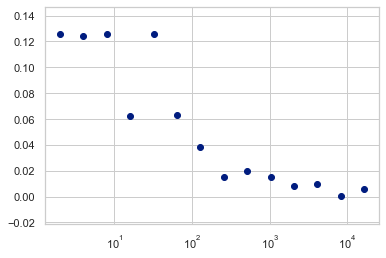

In [6]:
plt.figure()
plt.scatter(sizes, errors)
plt.xscale('log')

Though there are some deviations, it seem's like error decreases as the sample size grows. But, how to know where to stop? Also, how confident are we about our measurements considering the deviations in them? Fortunately, with the help of probability theory, we can determine the number of samples required to reach the desired confidence level for our estimate.

### Confidence Interval

We want to ensure that our estimate is close to true value of $p$. In other words, we want the probability of the event that our estimate is within a small interval around $p$ as high as possible. 
This probability, a.k.a. confidence level, can be formulated as such,


$$
\text{confidence level} = P[|p_{est} - p| \leq \text{interval}] \\
= 1 - P[|p_{est} - p| > \text{interval}]
= 1 - P[p_{est} > p + \text{interval} \hspace{4pt} \cup \hspace{4pt} p_{est} < p - \text{interval}] \\
= 1 - P[\frac{k}{n} > p + \text{interval} \hspace{4pt} \cup \hspace{4pt} \frac{k}{n} < p - \text{interval}] \\
= 1 - (P[k > n (p + \text{interval})] + P[k < n (p - \text{interval})])
$$

$$
P[k > n (p + \text{interval})] = P[n-k < n - n (p + \text{interval})] = P[n-k < n (1 - p - \text{interval}))]
$$

$$
\text{confidence level} = 1 - (P[n-k < n (1 - p - \text{interval}))] + P[k < n (p - \text{interval})]) \\
= 1 - ( F_{n,1-p}[n(1 - p - \text{interval})] + F_{n,p}[n(p - \text{interval})] ) \\
F: \text{Cumulative Distribution Function}
$$

So, we need to calculate cumulative mass function (CMF) of Binomial distribution parameterized with $p$ and $n$. But, we don't know p. It turns out that the above expression takes it minimum value at $p=0.5$. Therefore, we can find a lower bound on confidence level with $p=0.5$. The formula for confidence level becomes,

$$
\text{confidence level} >= 1 - ( F_{n,0.5}[n(0.5 - \text{interval})] + F_{n,0.5}[n(0.5 - \text{interval})] ) \\
= 1 - 2 F_{n,0.5}[n(0.5 - \text{interval})]
$$


Since we know the probability mass function (PMF) of Binomial Distribution, it is easy to calculate CMF.

$$
F_x[X] = P_x[x < X] = \sum\limits_{i=0}^{X-1} P[x=i]
$$

Let's define PMF by using ```scipy.special.comb``` for combination function.

In [7]:
from scipy.special import comb

In [8]:
def pmf(n, p, k):
    return comb(n, k) * p ** k * (1-p)**(n-k)

In [9]:
pmf(2, 0.5, 0)

0.25

In [10]:
pmf(100, .5, 50)

0.07958923738717873

In [11]:
pmf(2000, .5, 1000)

inf

As you see, for big n values, Scipy's comb method overflows since it is out of bounds of Python's floating point number. To overcome this, we can use an approximation for log of combination function.

$$
\binom{N}{k} \sim \frac{2^{nH(k/n)}}{\sqrt{2\pi k (1 - \frac{k}{n})}}
$$
$$
H(a) = a \log \frac{1}{a} + (1-a) \log \frac{1}{1-a} \tag*{[Entropy function]}
$$

In [12]:
def entropy_function(a, eps=1e-32):
    return a * np.log2(1 / (a + eps)) + (1 - a) * np.log2(1 / (1 - a + eps))

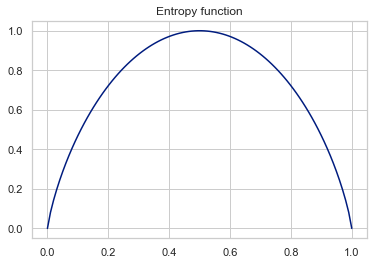

In [13]:
x = np.linspace(0, 1, 100)
y = entropy_function(x) 

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Entropy function");

In [14]:
@np.vectorize
def log_comb_approximate(n, k, eps=1e-32):
    if k==0 or k==n: return float("-inf")
    if k==1 or k==(n-1): return np.log(n)
    
    a = k/n
    return n * entropy_function(a) * np.log(2) - np.log(np.sqrt(2 * np.pi * a * (1-a) * n) + eps)

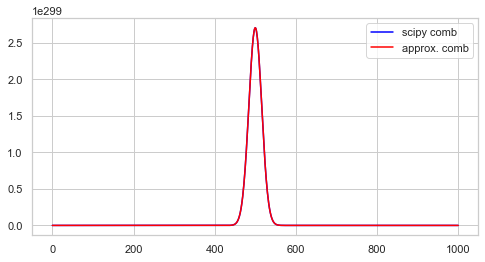

In [15]:
n = 1000
plt.figure(figsize=(8, 4))
plt.plot(comb(n, np.arange(n+1)), color='blue')
plt.plot(np.exp(log_comb_approximate(n, np.arange(n+1))).T, color='red')
plt.legend(['scipy comb', 'approx. comb']);

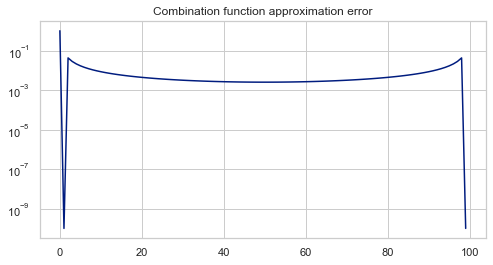

In [16]:
n = 100
k = np.arange(n)
expected = comb(n, k)
approximate = np.exp(log_comb_approximate(n, k))

eps = 1e-8
rel_error = np.abs(approximate/(expected+eps) - 1)

fig, ax = plt.subplots(figsize=(8, 4))
ax.semilogy(k, rel_error)
ax.set_title('Combination function approximation error');

OK, the approximation seems pretty close. Now, we can define PMF.

In [17]:
def binomial_pmf(n, p, k, eps=1e-32):
    if isinstance(p, (float, int)):
        p = [p]
    if isinstance(k, (float, int)):
        k = [k]
    p = np.array(p)[:, None]
    k = np.array(k)[None, :]
    return np.exp(log_comb_approximate(n, k) + k * np.log(p + eps) + (n - k) * np.log(1 - p + eps))

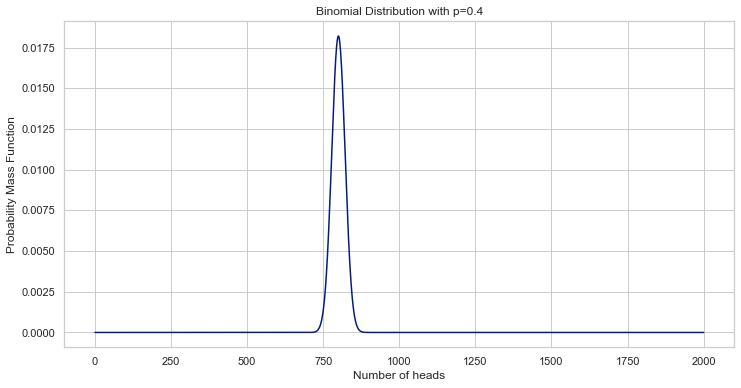

In [18]:
n = 2000
p = 0.4
k = np.arange(n+1)
pmf = binomial_pmf(n, p, k).T

plt.figure(figsize=(12, 6))
plt.plot(k, pmf)
plt.xlabel("Number of heads")
plt.ylabel("Probability Mass Function")
plt.title(f"Binomial Distribution with p={p}");

Let's sanity-check approximated PMF.

In [19]:
print(pmf.sum())

1.0001320546143024


CMF is just cumulative sum of PMF.

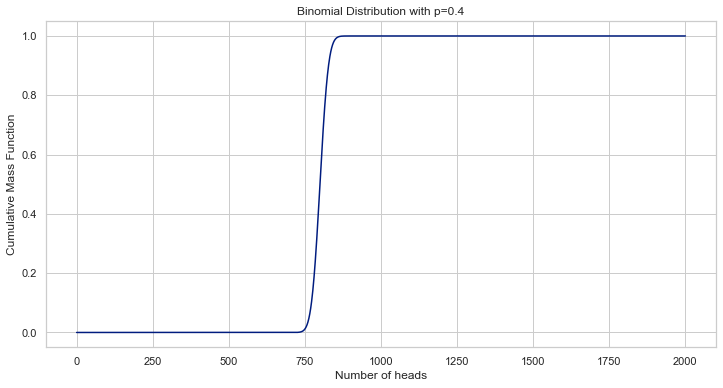

In [20]:
n = 2000
p = 0.4
k = np.arange(n+1)
pmf = binomial_pmf(n, p, k, eps=1e-32)
cmf = pmf.cumsum(-1).T

plt.figure(figsize=(12, 6))
plt.plot(k, cmf)
plt.xlabel("Number of heads")
plt.ylabel("Cumulative Mass Function")
plt.title(f"Binomial Distribution with p={p}");

Now, let's define a function that calculates confidence level for given sample size and interval.


$$\text{confidence level} \geq 1 - 2 F_{n,0.5}[n(0.5 - \text{interval})]$$

In [21]:
def compute_confidence(n, interval):
    p = 1/2
    low = np.ceil(n*(p-interval)).astype(np.int)
    pmf = binomial_pmf(n, p, k=np.arange(low+1)).squeeze()
    cmf = pmf.cumsum()
    return 1 - 2 * cmf[low]

Let's say we want a tight interval around true value of $p$, so we set it 0.01. 

In [22]:
interval = 0.01

And for sample size of $n=100$, the minimum confidence becomes, 

In [39]:
n = 100
conf = compute_confidence(n, interval)
print(f"confidence level >{conf: %}")

confidence level > 7.725091%


This is very low, we definitely need more samples. Let's go for $n=1000$.

In [38]:
n=1000
conf = compute_confidence(n, interval)
print(f"confidence level >{conf: %}")

confidence level > 45.188993%


It gets better, but we cannot keep trying all values one by one. Let's plot confidence level against different sample sizes.

In [25]:
#collapse-hide
import matplotlib.ticker as mtick

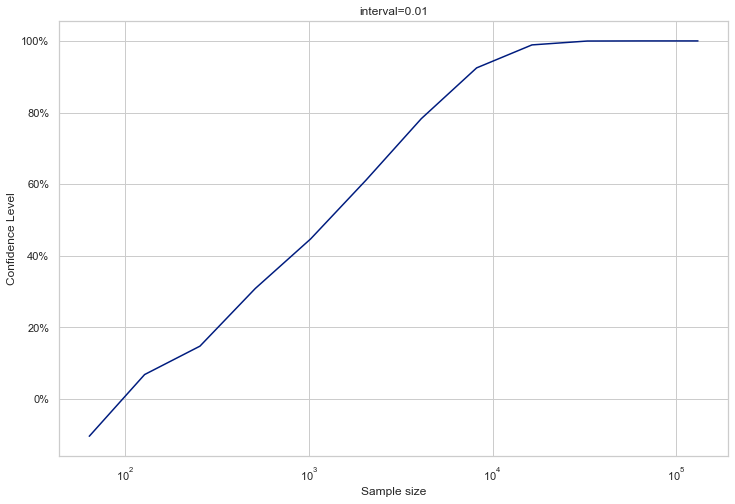

In [26]:
ns = np.power(2, np.arange(6, 18)) # sample sizes
confs = np.array([compute_confidence(n, interval) for n in ns]).squeeze()

plt.figure(figsize=(12, 8))
plt.semilogx(ns, confs*100)
plt.ylabel("Confidence Level")
plt.xlabel('Sample size')
plt.title(f"interval={interval}")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

We need more than 10,000 samples to have confident estimate of $p$.

Let's see how it changes with different interval values.

In [27]:
intervals = np.arange(1, 5) / 100
ns = np.power(2, np.arange(6, 17)) # sample sizes
confs = np.array([[compute_confidence(n, interval) for n in ns] for interval in intervals]).squeeze()

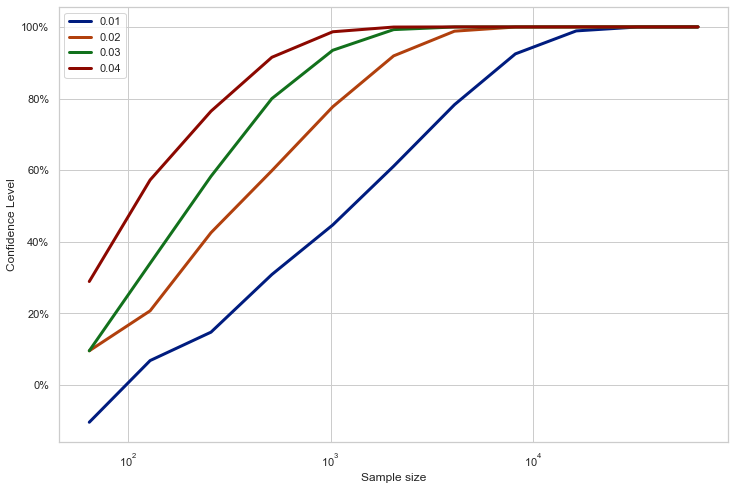

In [28]:
plt.figure(figsize=(12, 8))
plt.semilogx(ns, confs.T*100, lw=3)
plt.ylabel("Confidence Level")
plt.xlabel('Sample size')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend([f'{interval}' for interval in intervals]);

As interval gets tighter, we need more samples for a confidence level. Now, let's write a function that calculates required sample size for given interval and confidence level. 

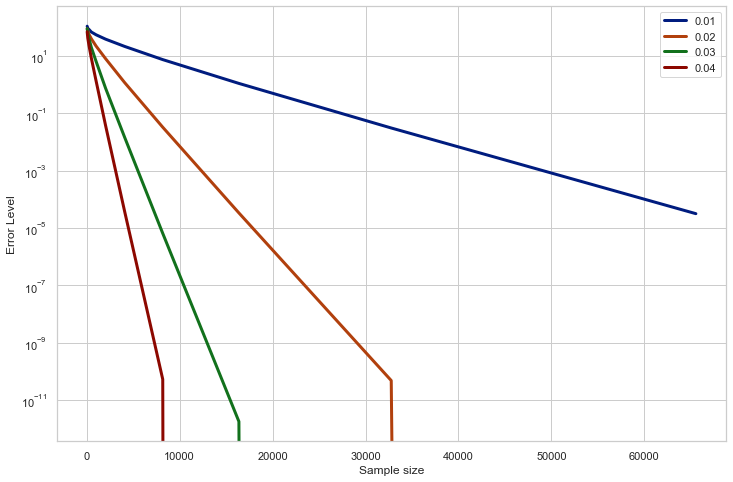

In [29]:
plt.figure(figsize=(12, 8))
plt.semilogy(ns, (1 - confs.T)*100, lw=3)
plt.ylabel("Error Level")
plt.xlabel('Sample size')
plt.legend([f'{interval}' for interval in intervals]);

The error ($1 - \text{confidence level}$) gets exponentially smaller as the sample size increases. Hence, we fit a 1D spline linear interpolator on logarithm of error with respect to sample size.

In [30]:
from scipy.interpolate import interp1d

def find_sample_size(confidence, interval, p=1/2, eps=1e-32):
    assert interval >= .01
    
    ns = np.power(2, np.arange(1, 18))
    confs = np.array([compute_confidence(n, interval) for n in ns]).squeeze()
    confs = np.clip(confs, 0, 1)
    inconfs = 1 - confs
    f = interp1d(np.log(inconfs + eps), ns, kind='slinear')
    return f(np.log(1-confidence))

Let's check for various confidence levels.

In [31]:
#hide_input
conf = .95
interval = .04
nr = int(find_sample_size(conf, interval))

print(f"Min sample size for conf={conf}, interval={interval} is {nr}")

Min sample size for conf=0.95, interval=0.04 is 659


In [32]:
#hide_input
conf = .95
interval = .01
nr = int(find_sample_size(conf, interval))

print(f"Min sample size for conf={conf}, interval={interval} is {nr}")

Min sample size for conf=0.95, interval=0.01 is 9943


In [33]:
#hide_input
conf = .999999
interval = .01
nr = int(find_sample_size(conf, interval))

print(f"Min sample size for conf={conf}, interval={interval} is {nr}")

Min sample size for conf=0.999999, interval=0.01 is 60058


## Conclusion

Let's say we tossed the coin for 659 times and the number of heads is 309. So, our estimate for $p$ is 0.47. Does this mean $p$ is likely to be in 0.47 ± 0.04? No, quite the opposite. The probability of heads is not probabilistic, it is a characteristic of the coin. We are trying to measure it. On the contrary, our estimate is probabilistic as we take finite number of samples to derive it. Hence, we can only talk about the likelihood of the estimate being close to true value. Specifically, the confidence interval states that there is 95% chance that the estimate is within +-4% interval of true value. 

This method can be used to determine number of samples required for polls, if we assume that each individual's answers are mutually independent from others'. The good news is the sample size required does not depend on population size and confidence level gets exponentially better w.r.t. sample size.